# Finding topics of Youtube videos. 

## Contents

1. Readings
2. Requirements
3. Procedure
4. Diagram
5. Working
6. Conclusion

## 1. Readings

#### a. Topic modelling

It is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus. It assists in better decision making.
      
#### b. LDA(Latent Dirichlet Allocation)

LDA’s approach to topic modeling is that, it considers each document as a collection of topics in a certain proportion, and each topic as a collection of keywords, again, in a certain proportion.

Once we provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

## 2. Requirements

* python 3.7
* jupyter notebook 5.7.4
* pafy 0.5.4
* ffmpeg 0.1.17
* spaCy 2.0.18
* nltk 3.4
* gensim 3.6.0
* google sppech API

## 3. Procedure

1. **Download pafy, tqdm, FFmpeg, spaCy, nltk and gensim. Enable google speech to text API and set its credentials**.
2. import packages
3. Extract audio from video.
4. Convert .webm to .wav format.
5. Break the audio file in smaller audio parts(here, 30 seconds each).
6. Convert each audio to text and store the transcription in one text file.
7. Similar process is applied to all the videos. 
8. Get transcription of some videos and combine in one to prepare the data-set.
9. Remove repetition, similar words, stop words(cleaning) and tokenize it.
10. Prepare a dicitionary for it and select some best topics out of it(using LDA model).
11. Provide the transcription to model and slect the topic with more probability.
12. Assign the most suitable lable.
13. Check for correctness of topic.

## 4 Diagram 

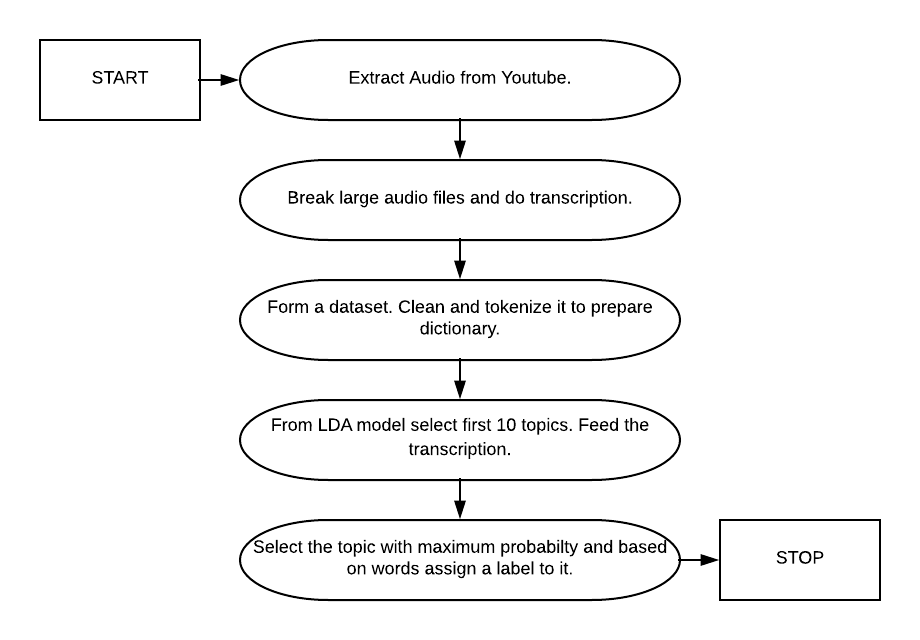

In [4]:
from IPython.display import Image
Image(filename = r"C:\Users\Inspiron 15\Desktop\images\Block Diagram.png", width = 700, height = 300)

## 5. Working 

### a. To get the audio from youtube videos

* **pafy 0.5.4** is being used.

* Each line contains the URL of the youtube videos which is provided to us file and indices(*1,2,3...,50*) are removed from each line to get the URL.

* Best audio is being downloaded in appropriate location. 

* Next cell contains the code.

In [ ]:
#code for extracting audio from a youtube video

import pafy

fileName = r"...\read.txt"   # file from which URLs are fetched
with open(fileName,'r') as f:
    for str in f:
        url = str.lstrip('0123456789. ') #removing the numbers in front of URL like, 3. https://www.youtube.com/watch?v=0Dc-FPlOsn0 is converted to >>https://www.youtube.com/watch?v=0Dc-FPlOsn0
        print(url)
        video = pafy.new(url) 
        bestaudio = video.getbestaudio() 
        bestaudio.download(r"...\store\\") # path where audi files are stored

print("success ")

#### Input

* File conatains the list of youtube videos.

https://github.com/Duttabhi/TopicModelling/blob/master/read.txt

#### Output
* Following link is the sample audio file which is fetched from above code. This sample is audio of the **first youtube video** which is listed in the file. 
**Rest audio files are not uploaded as it require good connectivity**.

* Audio file is of the form .webm. It is hence **converted** to .wav format(both .webm and .wav file is uploaded).

https://drive.google.com/drive/u/0/folders/1p9u9MopqoMU-YRukxLfXYImwt4zHyUCj


### b. Converting audio to text

* Google speech API is used. 
* Account is created in google cloud platfrom. After that, Google speech API is enabled.
* .json file is downloaded and google_cloud_speech_credentials are set. 
* Since google speech API only allows an audio of 60 seconds at a time. Audio is first chunked into smaller audios.
* FFmpeg is used is used to split audio in smaller segments of 30 seconds.
* **Command: ffmpeg -i [.wav file path] -f segment -segment_time 30 -c copy [...\out%09d.wav]**
* **out%09d** allows number in the format outXXXXXXXXX where X is a digit.
* Now, the chunked files are sorted so that they can be fed seriallly.
* A for loop is used to load audio file one by one for transcription.
* After each transcription the text are appended one after another.
* Finally, the stored in appropriate file.
* Following code illustrate it.

In [ ]:
import os
import speech_recognition as sr
from tqdm import tqdm

with open(r"path_to_json_file\textToSpeech.json") as f:
    GOOGLE_CLOUD_SPEECH_CREDENTIALS = f.read()

r = sr.Recognizer()
files = sorted(os.listdir(r'path_to_all_the_chunked_audio_files')) #sorting the chunked files

all_text = []

for f in tqdm(files):
    name = r"path_to_all_the_chunked_audio_files" + f # f is name of the files which are fed
    # Load audio file
    with sr.AudioFile(name) as source:
        audio = r.record(source)
    # Transcribe audio file
    text = r.recognize_google_cloud(audio, credentials_json=GOOGLE_CLOUD_SPEECH_CREDENTIALS)
    all_text.append(text) #appending the transcription one after another.
transcript = ""
for i, t in enumerate(all_text):
    total_seconds = i * 30



#print(transcript)

with open(file_name_in_which_transcript_will_be_stored, "w") as f: #storing the transcription in appropriate file.
    f.write(transcript)


#### Output

* Following is the sample transcription of first Youtube video for about 7 minutes.
* **The transcription has time-stamp of 30 seconds**(As mentioned in code above).

https://github.com/Duttabhi/TopicModelling/blob/master/SampleTranscription.txt

### c. Tokenizing 

* About 20 videos transcriptions are combined and is tokenized as follows using spaCy.
* **spaCy 2.0.18** is used.

In [ ]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

### d. Cleaning the data

* Common words, words with similar meaning and stop words are removed.
* **nltk 3.4** is used.
* After that a function is defined to use all these above mentioned functionalities and prepare the text for topic modelling.


In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))


def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

### e. Creating dictionary 

* For each cleaned and tokenized line select random tokens which have probaility more than 99% to occur.
* Used **gensim 3.6.0** for LDA(Latent Dirichlet Allocation) model preparation to perform topic modelling. 
* Best 10 topics are generated.

In [3]:
import script
import random
text_data = []
with open(r'C:\Users\Inspiron 15\Desktop\transcription\t.csv') as f: #file in which the data set is present
    for line in f:
        tokens = script.prepare_text_for_lda(line) #it calls the function mentioned above to prepare the text in each line of data set.
#NOTE: each line is passed as parameter.
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)
            
#using gensim for topic modelling. Preparing the LDA topic model. 

from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
# words are being saved in dictionary for future use.
dictionary.save('dictionary.gensim') #saving the dictionary

import gensim
NUM_TOPICS = 10 #to get the top 20 topics from the data-set.
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)  

['technique']
['wonderful', 'right']
['somebody']
['developing', 'another', 'develop']
['important', 'clean', 'client']
['everybody', 'studio']
['think', 'young', 'photographer']
['first', 'account']
['industry']
['take', 'build']
['relationship', 'take']
['seeing', 'bikers', 'face']
['willing', 'whatever', 'take']
['really', 'important']
['beautiful', 'session', 'together']
['right', 'thing', 'accept']
['could', 'wrong', 'happen']
['great', 'seam', 'seam']
['actually', 'build', 'beard', 'right']
['pull', 'alive']
['seven', 'important']
['processing', 'general']
['wonderful', 'boutique', 'place']
['graphics', 'aaron', 'extremely']
['government', 'official', 'working']
['really', 'europe']
['sometimes', 'heart', 'pull']
[]
['designing', 'really', 'important']
['engineer', 'building', 'things']
['somewhere', 'start']
['hear']
['range', 'vertical', 'conduct']
['chapter']
['implement', 'different']
['second', 'chapter']
['build']
['really', 'check']
['user', 'critical', 'ensure']
['sandro'

### f. Applying the model

* tested the LDA topic model over an unknown text to get a probable topic.
* Transcription of 5th you-tube video is fed to check what probable topic, the model results to. Link: https://www.youtube.com/watch?v=A_gHQq9iLxg

In [6]:
new_doc = '''hi I'm here with Richard Fulcher
Richard is a UX designer at Google
senior UX designer that's right and has
been working on UX for the last 15 years
thank you for joining us Richard it's a
pleasure to be here today thanks for
having me to get started can you
describe what user experience design is
sure it's it's a big umbrella of several
related disciplines that are all focused
on the design of experiences to help a
individual person you know achieve some
kind of goal and that covers a lot of
different types of experiences most
commonly we think about software design
but it's also things like environment
design and maybe the design of physical
products it could even be things like
event coordination it's kind of anything
that a user experiences that can be
constructed for them when I was kind of
first taught this there was kind of five
key concepts it's the study of users and
their context can the environment they
operate in in order that we can design
tools for them to achieve tasks that let
them complete goals so users context
tasks and goals goals okay so let's
start with the user who are they well
the user is anyone who's going to use
the product or the service that you're
designing and it's really important to
remember that that runs a really wide
range you know it's very easy to kind of
when you're designing just think about
designing for yourself or this like one
super idealized user that you have in
mind
but in reality you're gonna be building
this for people with very different
levels of experience with different
contexts and different backgrounds that
affect how they'll perceive this thing
that you build for them all right and
how do I know who the user is
well the key for that is something
called user research I think it's kind
of most associated with this idea of
taking this product you're working on
and and testing it in some way you know
having a user come in and try to perform
a series of tasks
that you assign them and see how they do
and see the things that are problems for
them but user research really covers the
whole end-to-end development of the
product even before you've drawn your
first screen you can engage with user
research to go into your potential users
homes or workplaces to start to
understand you know that context that's
important to the way that they behave
and what their goals are and once you've
even kind of finished and shipped you
can do things like look at logs and try
to analyze usage patterns see what
people are doing with your product
perhaps kind of bias towards things that
you want them to do more of or see areas
that they're spending a lot of time in
that you haven't anticipated
''' #transcript whose topic is to be fetched
new_doc = script.prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

#Following results to topics with probabilities. Topic with more probabilty is selected as the suited one.

[(1, 2), (9, 2), (13, 3), (16, 2), (18, 1), (26, 3), (31, 1), (32, 1), (51, 2), (55, 3), (56, 1), (58, 5), (60, 3), (63, 1), (66, 4), (72, 3), (74, 1), (81, 1), (84, 2), (86, 1), (89, 1), (90, 1), (112, 1), (124, 1), (129, 1), (145, 1), (151, 1), (154, 1), (155, 1), (156, 1), (169, 1), (170, 1), (177, 2)]
[(0, 0.03249784), (1, 0.045114867), (2, 0.074610524), (3, 0.09469039), (4, 0.1379185), (5, 0.096762046), (6, 0.08481216), (7, 0.06480671), (8, 0.09453054), (9, 0.27425644)]


#### Output

* Topic 9(0.27424648 probability) which has words things, important,actually and perform.
* **We can conclude that, it talks about things which are important for performance!** 

### g. Assigning human readable labels

* The above topic can be labelled as *important features* by our wisdom.
* Followed the link: http://www.aclweb.org/anthology/P11-1154 but could not figure out how to implement it.

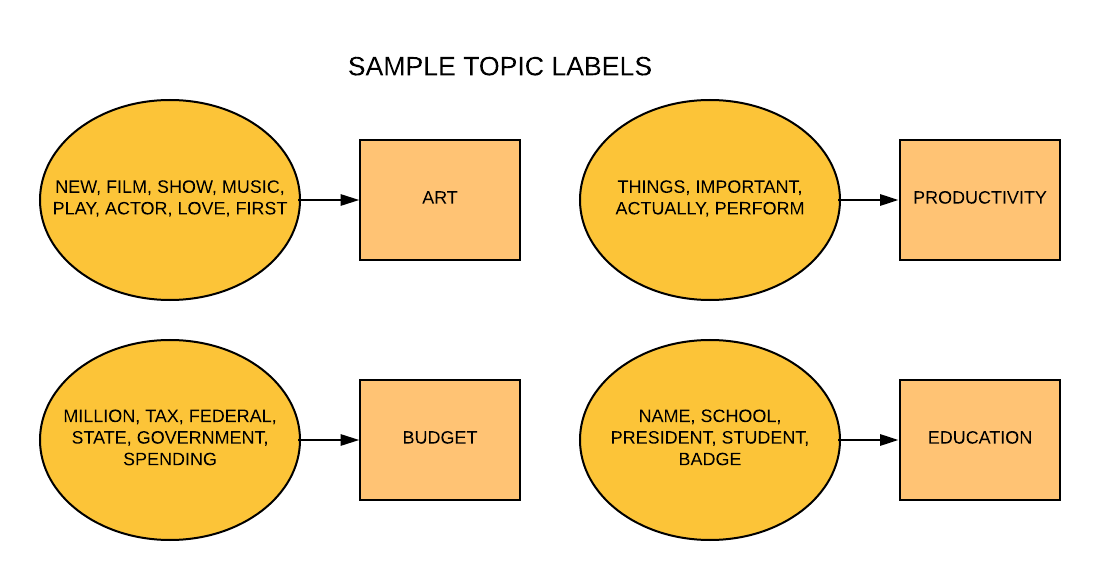

In [5]:
from IPython.display import Image 
Image(filename = r"C:\Users\Inspiron 15\Desktop\images\labels.png", width = 700, height = 300)

## 6. Conclusion

* Approximate topic for a youtube video is assigned.
* Similar procedure is applied to other videos and near about results are obtained.